# QUBIC +

We try to construct another hypotetical instrument, QUBIC+ which is a combination of QUBIC and Simons obervatory experiments. 

The maps of S4 have these parameters :

$$\nu_i \hspace{1cm} \Delta \nu_i \hspace{1cm} \sigma_i$$

with $\nu$ is the frequency, $\Delta \nu$ is the bandwidth and $\sigma$ is the RMS of noise maps. The index $i$ is the sub-band of the observations. We consider now QUBIC+ with those parameters :

$$\nu_i \times n \hspace{1cm} \frac{\Delta \nu_i}{n} \hspace{1cm} \sigma_i \times \frac{\sqrt{n} \times (1 + \epsilon)}{f}$$

with $n$ the number of reconstruted sub-bands. $\epsilon$ is the relative optimality because of bolometric interferometry, $f$ is the fraction of CMB-S4 sensitivity and goes from $ \sqrt{n} \times (1 + \epsilon)$ to $1$.

In [1]:
import qubicplus
import CMBS4
import pysm3
import pysm3.units as u
from pysm3 import utils
import numpy as np
from qubic import camb_interface as qc
import healpy as hp
import matplotlib.pyplot as plt
import os
import random as rd
import string
import qubic
from importlib import reload
import pickle

plt.rc('figure',figsize=(16,4))
plt.rc('font',size=12)

center = qubic.equ2gal(0, -57)
# If there is not this command, the kernel shut down every time..
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
nside=256
covmap = hp.ud_grade(hp.read_map('QUBIC-Typical-Coverage.fits'), nside)
skyconfig = {'cmb':42, 'dust':'d0'}

thr = 0.1
mymask = (covmap > (np.max(covmap)*thr)).astype(int)
pixok = mymask > 0

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 128
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [8]:
pkl_file = open('S4_dict.pkl', 'rb')
S4_dict = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('BI_dict.pkl', 'rb')
BI_dict = pickle.load(pkl_file)
pkl_file.close()

In [36]:
reload(CMBS4)

mapS4_withoutiib = CMBS4.S4(skyconfig, S4_dict).getskymaps(same_resol=False, verbose=True, coverage=covmap)

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:37: UserWarning: Access data from /tmp/VVFSjQqRDI
  warnings.warn(f"Access data from {full_path}")


    FWHM : [0.18333333 1.21333333 1.21333333 0.425      0.425      0.37833333
 0.37833333 0.21666667 0.21666667] deg 
    nus : [ 20.  30.  40.  85.  95. 145. 155. 220. 270.] GHz 
    Bandwidth : [ 5.   9.  12.  20.4 22.8 31.9 34.1 48.4 59.4] GHz


Reconvolution to 0.18 deg
Reconvolution to 1.21 deg
Reconvolution to 1.21 deg
Reconvolution to 0.42 deg
Reconvolution to 0.42 deg
Reconvolution to 0.38 deg
Reconvolution to 0.38 deg
Reconvolution to 0.22 deg
Reconvolution to 0.22 deg


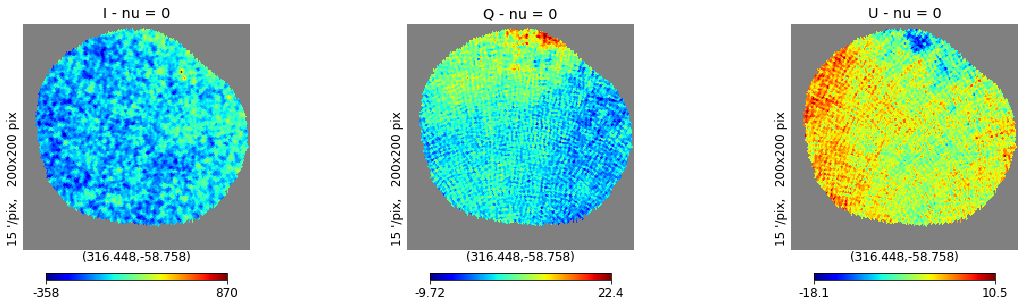

In [42]:
f=0

plt.figure()
hp.gnomview(mapS4_withoutiib[7, 0], rot=center, reso=15, cmap='jet', sub=(1, 3, 1), title='I - nu = {}'.format(f))
hp.gnomview(mapS4_withoutiib[7, 1], rot=center, reso=15, cmap='jet', sub=(1, 3, 2), title='Q - nu = {}'.format(f))
hp.gnomview(mapS4_withoutiib[7, 2], rot=center, reso=15, cmap='jet', sub=(1, 3, 3), title='U - nu = {}'.format(f))
plt.show()

It's seems to be ok. For now, we have all the maps at the right frequency and the right angular resolution but for only one single frequency. We have to create integration into band with respect to $\Delta \nu_i$ for S4 goes to $\frac{\Delta \nu_i}{n}$ for QUBIC+. We include in those functions an integrated into band argument which do the following :

- Take the central frequency and the bandwidth to cut into 4 frequencies
- We generate maps at same angular resolutions for these 4 frequencies
- We take the mean of those maps
- This allows to integrate into bands

In [44]:
reload(CMBS4)

mapS4_withiib = CMBS4.S4(skyconfig, S4_dict).getskymaps(same_resol=False, iib=True, verbose=True, coverage=covmap)

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:37: UserWarning: Access data from /tmp/KvcCk9wnEN
  warnings.warn(f"Access data from {full_path}")


    FWHM : [0.18333333 1.21333333 1.21333333 0.425      0.425      0.37833333
 0.37833333 0.21666667 0.21666667] deg 
    nus : [ 20.  30.  40.  85.  95. 145. 155. 220. 270.] GHz 
    Bandwidth : [ 5.   9.  12.  20.4 22.8 31.9 34.1 48.4 59.4] GHz


Integrated from 17.50 to 22.50 GHz
Reconvolution to 0.18 deg
Integrated from 25.50 to 34.50 GHz
Reconvolution to 1.21 deg
Integrated from 34.00 to 46.00 GHz
Reconvolution to 1.21 deg
Integrated from 74.80 to 95.20 GHz
Reconvolution to 0.42 deg
Integrated from 83.60 to 106.40 GHz
Reconvolution to 0.42 deg
Integrated from 129.05 to 160.95 GHz
Reconvolution to 0.38 deg
Integrated from 137.95 to 172.05 GHz
Reconvolution to 0.38 deg
Integrated from 195.80 to 244.20 GHz
Reconvolution to 0.22 deg
Integrated from 240.30 to 299.70 GHz
Reconvolution to 0.22 deg


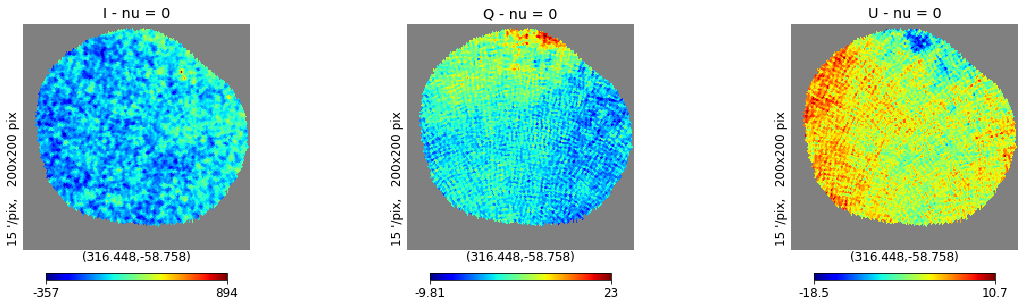

In [45]:
f=0

plt.figure()
hp.gnomview(mapS4_withiib[7, 0], rot=center, reso=15, cmap='jet', sub=(1, 3, 1), title='I - nu = {}'.format(f))
hp.gnomview(mapS4_withiib[7, 1], rot=center, reso=15, cmap='jet', sub=(1, 3, 2), title='Q - nu = {}'.format(f))
hp.gnomview(mapS4_withiib[7, 2], rot=center, reso=15, cmap='jet', sub=(1, 3, 3), title='U - nu = {}'.format(f))
plt.show()

In [81]:
reload(CMBS4)

mapS4_noisy, _, noiseS4 = CMBS4.S4(skyconfig, S4_dict).getskymaps(same_resol=False, iib=False, verbose=True, 
                                                                    coverage=covmap, noise=True)

/Users/mathiasregnier/miniconda3/lib/python3.8/site-packages/pysm3/utils/data.py:37: UserWarning: Access data from /tmp/R3W9Ydor5L
  warnings.warn(f"Access data from {full_path}")


    FWHM : [0.18333333 1.21333333 1.21333333 0.425      0.425      0.37833333
 0.37833333 0.21666667 0.21666667] deg 
    nus : [ 20.  30.  40.  85.  95. 145. 155. 220. 270.] GHz 
    Bandwidth : [ 5.   9.  12.  20.4 22.8 31.9 34.1 48.4 59.4] GHz


Reconvolution to 0.18 deg
Reconvolution to 1.21 deg
Reconvolution to 1.21 deg
Reconvolution to 0.42 deg
Reconvolution to 0.42 deg
Reconvolution to 0.38 deg
Reconvolution to 0.38 deg
Reconvolution to 0.22 deg
Reconvolution to 0.22 deg


IndexError: boolean index did not match indexed array along dimension 2; dimension is 3145728 but corresponding boolean dimension is 786432

In [ ]:
f=3

plt.figure()
hp.gnomview(mapS4_noisy[f, 0], rot=center, reso=15, cmap='jet', sub=(1, 3, 1), title='I - nu = {}'.format(f))
hp.gnomview(mapS4_noisy[f, 1], rot=center, reso=15, cmap='jet', sub=(1, 3, 2), title='Q - nu = {}'.format(f))
hp.gnomview(mapS4_noisy[f, 2], rot=center, reso=15, cmap='jet', sub=(1, 3, 3), title='U - nu = {}'.format(f))
plt.show()